Dataset

In [2]:
import numpy
import time

In [3]:
from sklearn.model_selection import train_test_split
ds = numpy.loadtxt("HTRU_2.csv", dtype=float, delimiter=',', usecols=[0,1,2,3,4,5,6,7,8])
X = ds[:, :-1]
y = ds[:, -1]

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.25, random_state=25)

trainy = list(map(int, trainy))
testy = list(map(int, testy))

print("Training set size: ",numpy. size(trainX, 0))
print("Testing set size: ", numpy. size(testX, 0))

Training set size:  13423
Testing set size:  4475


KNN

KNN Computational Times for both training and testing

In [19]:
from sklearn.metrics import accuracy_score

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
start_train_time = time.time()
model.fit(trainX, trainy)
train_elapsed_time = time.time() - start_train_time

#Predict Output
start_Test_time = time.time()
predictionKNN= model.predict(testX)
Test_elapsed_time = time.time() - start_Test_time

print("KNN Computational Train Time Spent: ", train_elapsed_time)
print("KNN Computational Test Time Spent: ", Test_elapsed_time)
print('KNN Accuracy score is {}'.format(accuracy_score(testy, predictionKNN)))

KNN Computational Train Time Spent:  0.01803445816040039
KNN Computational Test Time Spent:  0.09275269508361816
KNN Accuracy score is 0.9713966480446927


Cross Validation for optimal k

The optimal value for k is  15
Cross validation computational time spent: 10.2264084815979


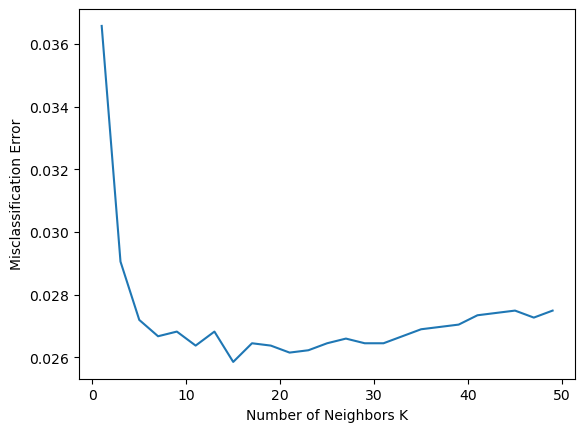

In [5]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

#trainX, testX, trainy, testy
#hyper parameter tuning.Selecting best K
neighbors = [x for x in range(1,50) if x % 2 != 0]

# empty list that will hold cv scores
cv_scores = []

start_time = time.time()

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, trainX, trainy, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#graphical view
#misclassification error
MSE = [1-x for x in cv_scores]

#optimal K
optimal_k_index = MSE.index(min(MSE))
optimal_k = neighbors[optimal_k_index]

elapsed_time = time.time() - start_time

print('The optimal value for k is ',optimal_k)
print("Cross validation computational time spent:",elapsed_time)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

ROC Curve with optimal k from the cross validation

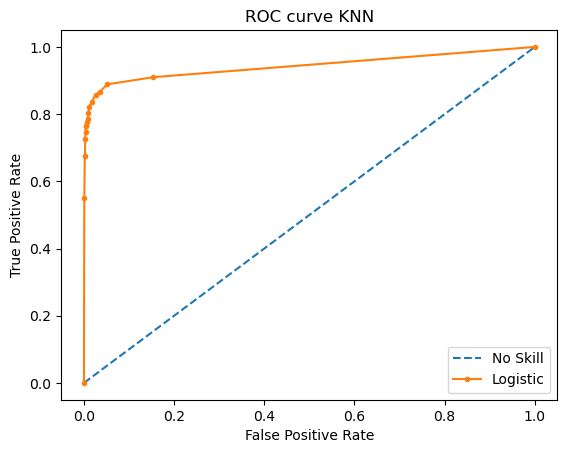

In [6]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
#model = KNeighborsClassifier(n_neighbors=optimal_k)
model = KNeighborsClassifier(n_neighbors=15)

model.fit(trainX, trainy)

# predict probabilities
lr_probsk = model.predict_proba(testX)

# prediction
predictionKNN= model.predict(testX)

# keep probabilities for the positive outcome only
lr_probsK = lr_probsk[:, 1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fprK, lr_tprK, _ = roc_curve(testy, lr_probsK)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fprK, lr_tprK, marker='.', label='Logistic')
# axis labels

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve KNN')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()


KNN Confusion Matrix


In [7]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(predictionKNN, testy, labels=[1.0, 0.0])
print(f"KNN Confusion matrix:\n {matrix}")

KNN Confusion matrix:
 [[ 331   33]
 [  91 4020]]


AdaBoost

AdaBoost Computational Times for both training and testing

In [20]:
from sklearn.ensemble import AdaBoostClassifier

#trainX, testX, trainy, testy
start_train_time = time.time()
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(trainX, trainy)
train_elapsed_time = time.time() - start_train_time

start_Test_time = time.time()
predictionAdaB = clf.predict(testX)
Test_elapsed_time = time.time() - start_Test_time

print("AdaBoost Computational Train Time Spent: ", train_elapsed_time)
print("AdaBoost Computational Test Time Spent: ", Test_elapsed_time)
print('AdaBoost Accuracy score is {}'.format(accuracy_score(predictionAdaB, testy)))

AdaBoost Computational Train Time Spent:  1.222853183746338
AdaBoost Computational Test Time Spent:  0.03166079521179199
AdaBoost Accuracy score is 0.9769832402234637


AdaBoost ROC Curve 

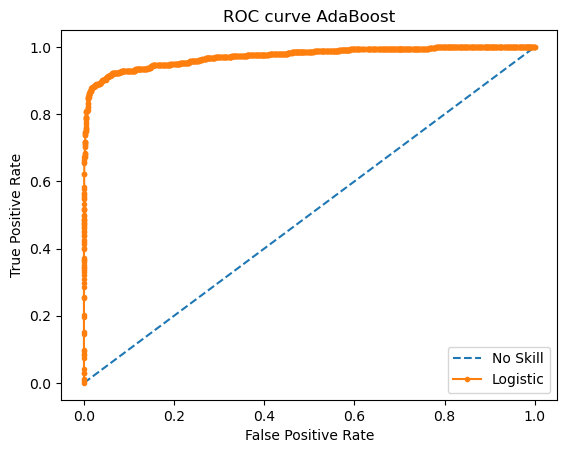

In [17]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
#model = LogisticRegression(solver='lbfgs')
model = AdaBoostClassifier(n_estimators=100, random_state=0)

model.fit(trainX, trainy)

# predict probabilities
lr_probsA = model.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probsA = lr_probsA[:, 1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fprA, lr_tprA, _ = roc_curve(testy, lr_probsA)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fprA, lr_tprA, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve AdaBoost')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

AdaBoost Confusion Matrix

In [10]:
matrixAdaB = confusion_matrix(predictionAdaB, testy, labels=[1.0, 0.0])
print(f"AdaBoost Confusion matrix:\n {matrixAdaB}")

AdaBoost Confusion matrix:
 [[ 352   33]
 [  70 4020]]


SVM

SVM Computational Times for both training and testing

In [21]:
from sklearn import svm
from sklearn.svm import LinearSVC

#trainX, testX, trainy, testy
start_svm_time = time.time()
SVMclf = svm.SVC(kernel='linear', C=1)
SVMclf.fit(trainX, trainy)
elapsed_svm_time = time.time() - start_svm_time
start_test_svm_time = time.time()
predictionSVC = SVMclf.predict(testX)
test_elapsed_svm_time = time.time() - start_test_svm_time

print("SVM Train Time spent: ", elapsed_svm_time)
print("SVM Test Time spent: ", test_elapsed_svm_time)
print('SVM Accuracy score is {}'.format(accuracy_score(testy, predictionSVC)))

SVM Train Time spent:  14.532569408416748
SVM Test Time spent:  0.05601143836975098
SVM Accuracy score is 0.9774301675977654


SVM Cross Validation

The optimal parameter of the SVM is  11
Cross validation computational time for SVM:  3005.5323009490967


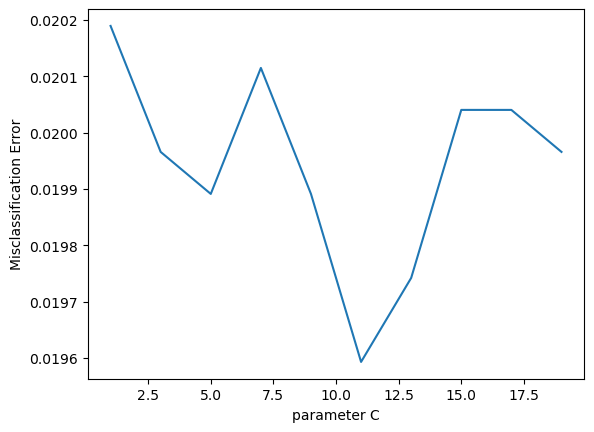

In [12]:
from sklearn.model_selection import cross_val_score

#hyper parameter tuning.Selecting best K
parameterC = [x for x in range(1,20) if x % 2 != 0]

# empty list that will hold cv scores
cv_scores = []

start_time = time.time()

for cValue in parameterC:
    clf = svm.SVC(kernel='linear', C=cValue, random_state=25)
    scores = cross_val_score(clf, trainX, trainy, cv=3)
    cv_scores.append(scores.mean())

#misclassification error
MSE = [1-x for x in cv_scores]

#optimal parameter
optimal_C_index = MSE.index(min(MSE))
optimal_C = parameterC[optimal_C_index]

elapsed_time = time.time() - start_time

print('The optimal parameter of the SVM is ',optimal_C)
print("Cross validation computational time for SVM: ",elapsed_time)

# plot misclassification error vs k
plt.plot(parameterC, MSE)
plt.xlabel('parameter C')
plt.ylabel('Misclassification Error')
plt.show()

SVM ROC Curve

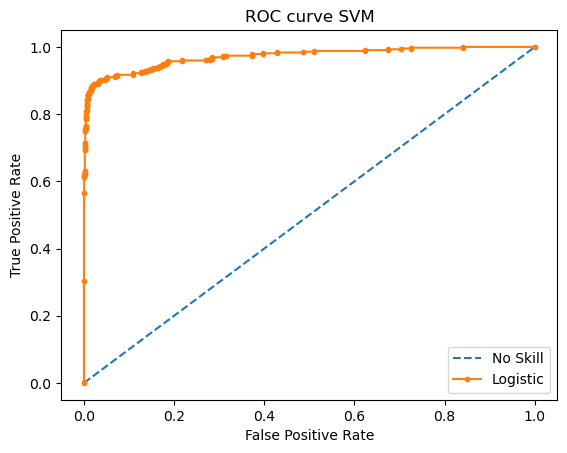

In [18]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]


model = svm.SVC(kernel='linear', C=optimal_C, probability=True)
model.fit(trainX, trainy)

# predict probabilities
lr_probsSVM = model.predict_proba(testX)

# predict probabilities
predictionSVM = model.predict(testX)

# keep probabilities for the positive outcome only
lr_probsSVM = lr_probsSVM[:, 1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fprSVM, lr_tprSVM, _ = roc_curve(testy, lr_probsSVM)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fprSVM, lr_tprSVM, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve SVM')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

SVM Confusion Matrix

In [14]:
matrixSVM = confusion_matrix(predictionSVM, testy, labels=[1.0, 0.0])
print(f"Confusion matrix:\n {matrixSVM}")

Confusion matrix:
 [[ 349   26]
 [  73 4027]]
